# Засоби підготовки та аналізу даних
### ФБ-22 Шафранський Даніїл
##### Лабораторна робота №6

#### Завдання 1

1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = k + b) для подальшого аналізу результатів.

In [345]:
import numpy as np
import matplotlib.pyplot as plt

k_true = 2
b_true = 5

x = np.random.rand(100)

noise = np.random.randn(100)
y = k_true * x + b_true + noise


2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.

In [346]:
def least_squares(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sum((x - x_mean) ** 2)
    
    k_est = num / den
    b_est = y_mean - k_est * x_mean
    
    return k_est, b_est

k_est, b_est = least_squares(x, y)
print(f"Estimated parameters using least squares: k = {k_est:.15f}, b = {b_est:.15f}")

Estimated parameters using least squares: k = 2.000232986231183, b = 4.857628998442546


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [347]:
k_np, b_np = np.polyfit(x, y, 1)
print(f"Estimated parameters using np.polyfit: k = {k_np:.15f}, b = {b_np:.15f}")

print(f"True parameters: k = {k_true}, b = {b_true}")
print(f"Difference (least squares): Δk = {abs(k_est - k_true):.15f}, Δb = {abs(b_est - b_true):.15f}")
print(f"Difference (np.polyfit): Δk = {abs(k_np - k_true):.15f}, Δb = {abs(b_np - b_true):.15f}")


Estimated parameters using np.polyfit: k = 2.000232986231184, b = 4.857628998442546
True parameters: k = 2, b = 5
Difference (least squares): Δk = 0.000232986231183, Δb = 0.142371001557454
Difference (np.polyfit): Δk = 0.000232986231184, Δb = 0.142371001557454


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

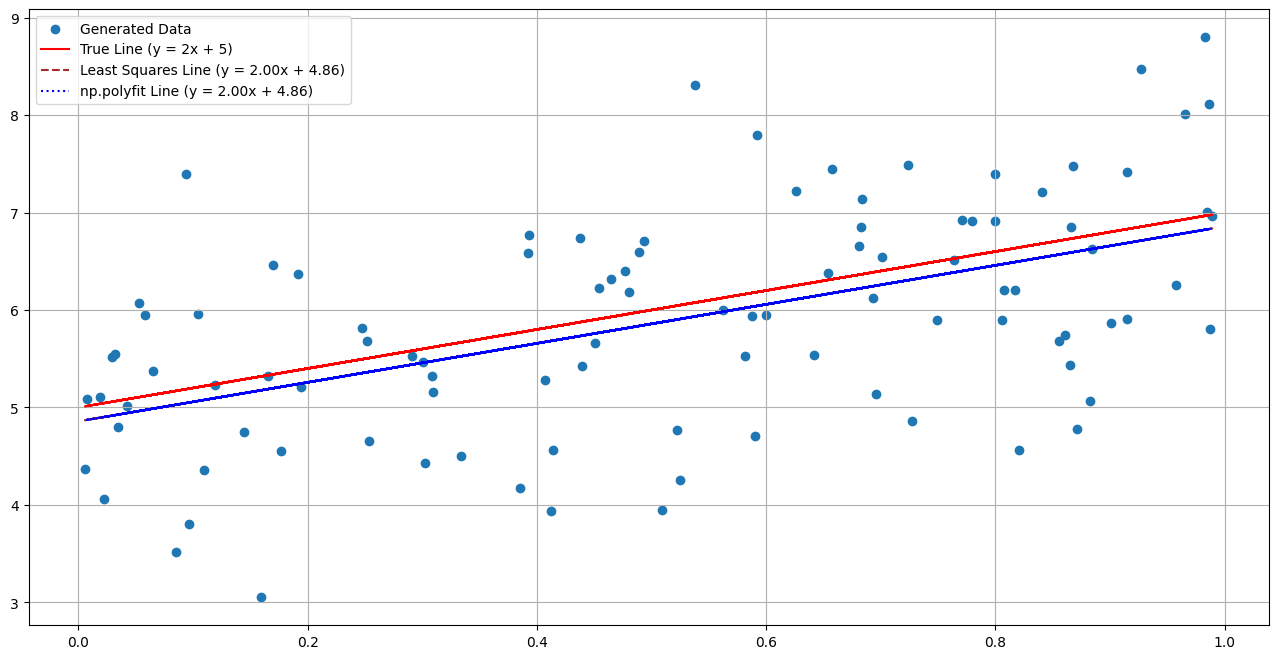

In [348]:
plt.figure(figsize=(16, 8))

plt.scatter(x, y, label='Generated Data')

plt.grid(visible=True)

plt.plot(x, k_true * x + b_true, color='red', label='True Line (y = 2x + 5)')

plt.plot(x, k_est * x + b_est, color='brown', linestyle='dashed', label=f'Least Squares Line (y = {k_est:.2f}x + {b_est:.2f})')

plt.plot(x, k_np * x + b_np, color='blue', linestyle='dotted', label=f'np.polyfit Line (y = {k_np:.2f}x + {b_np:.2f})')

plt.legend()
plt.show()

#### Завдання 2

1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [349]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    n = len(x)
    k = 0
    b = 0

    for i in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred

        k_grad = -2 * np.sum(x * error) / n
        b_grad = -2 * np.sum(error) / n

        k -= learning_rate * k_grad
        b -= learning_rate * b_grad

    return k, b

learning_rate = 0.01
n_iter = 1000

k_gd, b_gd = gradient_descent(x, y, learning_rate, n_iter)
print(f"Estimated parameters using gradient descent: k = {k_gd:.2f}, b = {b_gd:.2f}")


Estimated parameters using gradient descent: k = 2.12, b = 4.79


2. Додайте отриману лінію регресії на загальний графік

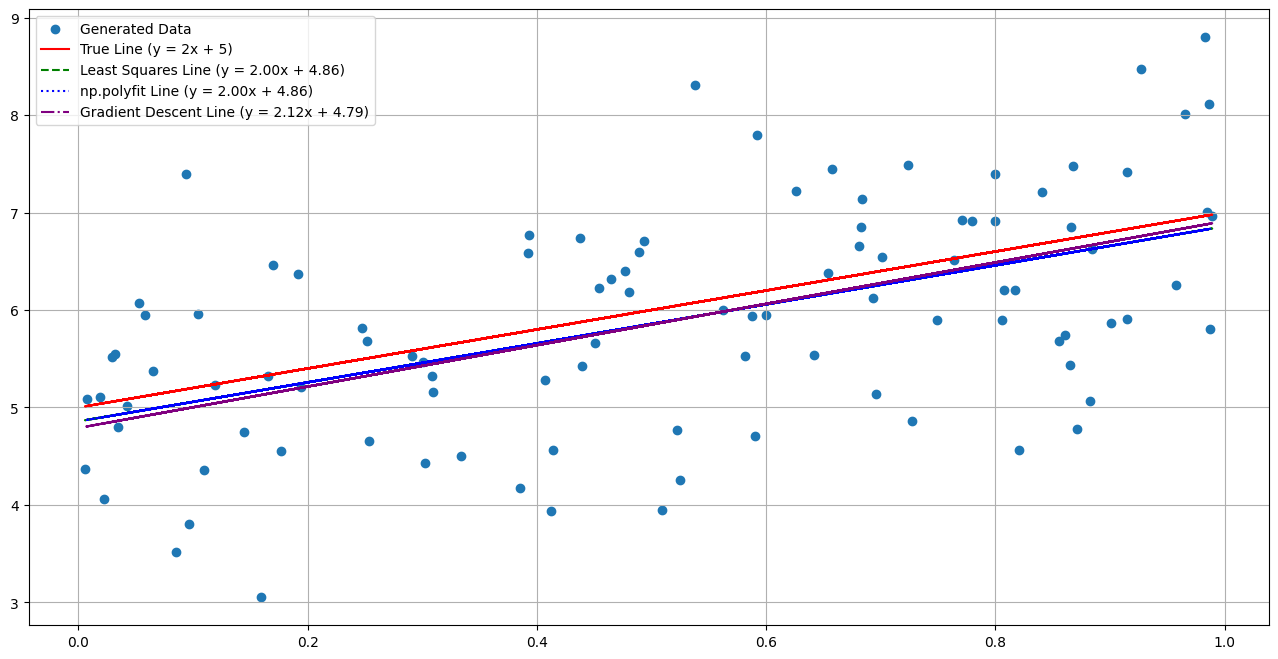

In [350]:
plt.figure(figsize=(16, 8))

plt.scatter(x, y, label='Generated Data')

plt.grid(visible=True)

plt.plot(x, k_true * x + b_true, color='red', label='True Line (y = 2x + 5)')

plt.plot(x, k_est * x + b_est, color='green', linestyle='dashed', label=f'Least Squares Line (y = {k_est:.2f}x + {b_est:.2f})')

plt.plot(x, k_np * x + b_np, color='blue', linestyle='dotted', label=f'np.polyfit Line (y = {k_np:.2f}x + {b_np:.2f})')

plt.plot(x, k_gd * x + b_gd, color='purple', linestyle='-.', label=f'Gradient Descent Line (y = {k_gd:.2f}x + {b_gd:.2f})')

plt.legend()
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

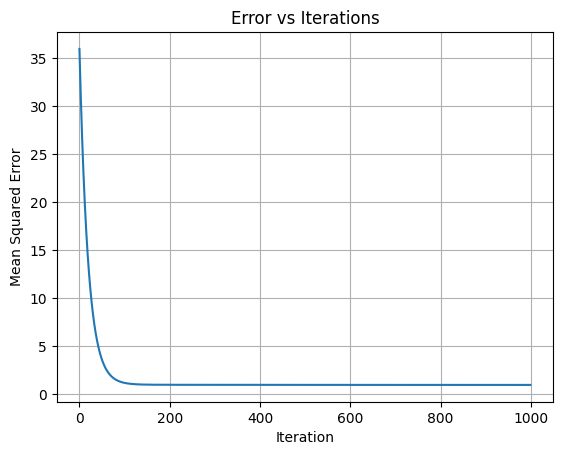

Minimum error achieved: 0.95


In [351]:
def gradient_descent_with_error(x, y, learning_rate=0.01, n_iter=1000):
    n = len(x)
    k = 0
    b = 0
    errors = []

    for i in range(n_iter):
        y_pred = k * x + b
        error = y - y_pred

        k_grad = -2 * np.sum(x * error) / n
        b_grad = -2 * np.sum(error) / n

        k -= learning_rate * k_grad
        b -= learning_rate * b_grad

        mse = np.mean(error ** 2)
        errors.append(mse)

    return k, b, errors

k_gd, b_gd, errors = gradient_descent_with_error(x, y, learning_rate, n_iter)

plt.plot(errors)
plt.grid(visible=True)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Error vs Iterations')
plt.show()

min_error = min(errors)
print(f"Minimum error achieved: {min_error:.2f}")

4. Порівняйте отримані результати з результатами попереднього завдання

In [352]:
print("Comparison of different methods:")
print(f"True parameters: k = {k_true}, b = {b_true}")
print(f"Least Squares: k = {k_est:.2f}, b = {b_est:.2f}, Δk = {abs(k_est - k_true):.2f}, Δb = {abs(b_est - b_true):.2f}")
print(f"np.polyfit: k = {k_np:.2f}, b = {b_np:.2f}, Δk = {abs(k_np - k_true):.2f}, Δb = {abs(b_np - b_true):.2f}")
print(f"Gradient Descent: k = {k_gd:.2f}, b = {b_gd:.2f}, Δk = {abs(k_gd - k_true):.2f}, Δb = {abs(b_gd - b_true):.2f}")

Comparison of different methods:
True parameters: k = 2, b = 5
Least Squares: k = 2.00, b = 4.86, Δk = 0.00, Δb = 0.14
np.polyfit: k = 2.00, b = 4.86, Δk = 0.00, Δb = 0.14
Gradient Descent: k = 2.12, b = 4.79, Δk = 0.12, Δb = 0.21
